# Comparison of Station Data and HRDPS

In [21]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#bring in data
hrdps = xr.open_dataset("hrdps_day_avgs_postSep2014.nc")
racerocks = pd.read_csv("RaceRocks.csv")
sheringham = pd.read_csv("Sheringham.csv")

In [3]:
hrdps

<xarray.Dataset>
Dimensions:       (time_counter: 2303, x: 193, y: 266)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2014-09-12 ... 2020-12-31
  * x             (x) float64 0.0 2.5e+03 5e+03 ... 4.75e+05 4.775e+05 4.8e+05
  * y             (y) float64 0.0 2.5e+03 5e+03 ... 6.575e+05 6.6e+05 6.625e+05
Data variables:
    atmpres       (time_counter, y, x) float32 ...
    nav_lat       (y, x) float64 ...
    nav_lon       (y, x) float64 ...
    tair          (time_counter, y, x) float32 ...
    u_wind        (time_counter, y, x) float32 ...
    v_wind        (time_counter, y, x) float32 ...

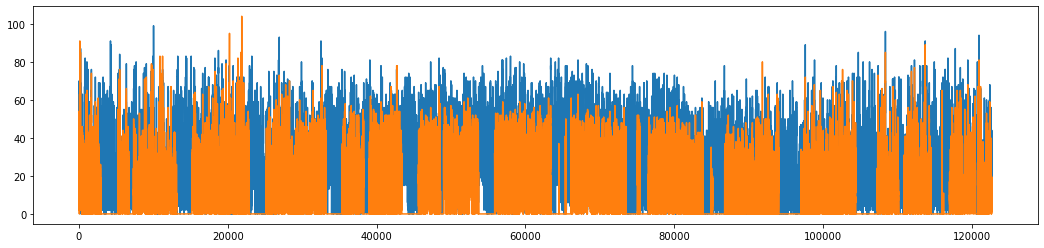

In [4]:
#plot the wind data at both stations
plt.figure(figsize=(18,4))
plt.plot(racerocks['Wind Spd (km/h)'])
plt.plot(sheringham['Wind Spd (km/h)']) #much more gaps in sheringham wind data (pressure is comparible), focus on racerocks

In [5]:
hrdps_lat = hrdps.nav_lat.values.flatten()
hrdps_lon = hrdps.nav_lon.values.flatten()

In [29]:
#want to isolate HRDPS data from nav_lat and nav_lon close to RaceRocks
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#Racerocks located at lat =48.3 lon =-123.53
lat = racerocks['Latitude (y)'][0]
lon = racerocks['Longitude (x)'][0]+360 #the lat and lon we want to aim for
buffer = 0.01 #play around in this until narrowed in on one best values
ind=0

for i in range(len(hrdps_lon)):
    if hrdps_lon[i] > (lon-buffer) and hrdps_lon[i] < (lon+buffer) and hrdps_lat[i] > (lat-buffer) and hrdps_lat[i] < (lat+buffer):
        ind=i

# closest = find_nearest(hrdps_lat,racerocks['Latitude (y)'][0])
# lat_ind = np.where(hrdps_lat == closest)[0][0]

# closest = find_nearest(hrdps_lon,racerocks['Longitude (x)'][0]+360)
# lon_ind = np.where(hrdps_lon == closest)[0][0]

print('HRDPS closest lat= '+str(hrdps_lat[ind])+', closest lon= '+str(hrdps_lon[ind]))

HRDPS closest lat= 48.290357646947975, closest lon= 236.46529316421274


In [15]:
#load in data variables you want to work with (focusing on wind)
U=hrdps.u_wind.values
V=hrdps.v_wind.values

In [23]:
#now convert data to 2D
start = time.time()
Uhrdps = np.empty([np.shape(U)[1]*np.shape(U)[2],np.shape(U)[0]])
               
for i in range(np.shape(U)[0]):
    Uhrdps[:,i] = np.reshape(U[i],(np.shape(U)[1]*np.shape(U)[2],))
print(f"time -U wind done (s):"+str(time.time()-start))

start = time.time()
Vhrdps = np.empty([np.shape(V)[1]*np.shape(V)[2],np.shape(V)[0]])
               
for i in range(np.shape(V)[0]):
    Vhrdps[:,i] = np.reshape(V[i],(np.shape(V)[1]*np.shape(V)[2],))
print(f"time -V wind done (s):"+str(time.time()-start))

time -U wind done (s):1.925041913986206
time -V wind done (s):1.9937565326690674


In [33]:
#now trim so that its only the location closest to Race Rocks
Uhrdps = Uhrdps[ind,:]
Vhrdps = Vhrdps[ind,:]

In [34]:
np.shape(Uhrdps) #i noticed through this that this is the hourly data, perhaps reload xarray in LoadFile notebook so that no hourly processing occurs there and occurs in PCS step instead

(2303,)